In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from pandas import Series, DataFrame
%config ZMQInteractiveShell.ast_node_interactivity='all' 
%matplotlib inline

In [2]:
result_df = pd.read_csv('data/us/2016-us-ge-by-county.csv')
result_df.drop('StateCode', axis=1, inplace=True)
result_df.drop('CountyFips', axis=1, inplace=True)
result_df.head()
result_df.shape
result_df.Party.value_counts()  
# GOP Grand Old Party 老大党 共和党

,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


(15565, 6)

GOP    3113
LIB    3113
CST    3113
DEM    3113
GRN    3113
Name: Party, dtype: int64

In [3]:
r = (result_df['Candidate'] == 'Trump')
print(type(r))
result_df[result_df['Candidate'] == 'Trump'].head()
result_df[result_df['Candidate'] == 'Trump'].shape

<class 'pandas.core.series.Series'>


,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


(3113, 6)

In [4]:
# 提取Trump数据
trump_df = result_df[result_df['Candidate'] == 'Trump']
trump_df.info()
trump_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3112
Data columns (total 6 columns):
StateName          3113 non-null object
CountyName         3113 non-null object
CountyTotalVote    3113 non-null int64
Party              3113 non-null object
Candidate          3113 non-null object
VoteCount          3113 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 170.2+ KB


,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


In [5]:
# Clinton
clinton_df = result_df[result_df['Candidate'] == 'Clinton']
clinton_df.info()
clinton_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 3113 to 6225
Data columns (total 6 columns):
StateName          3113 non-null object
CountyName         3113 non-null object
CountyTotalVote    3113 non-null int64
Party              3113 non-null object
Candidate          3113 non-null object
VoteCount          3113 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 170.2+ KB


,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
3113,alaska,Alaska,246588,DEM,Clinton,93007.0
3114,alabama,Macon,8748,DEM,Clinton,7237.0
3115,alabama,Wilcox,6095,DEM,Clinton,4329.0
3116,alabama,Coosa,5223,DEM,Clinton,1780.0
3117,alabama,Blount,25384,DEM,Clinton,2150.0


In [6]:
# 合并成一张表并按州分组， 给出投票率

result_df = pd.merge(trump_df, clinton_df, 
                     on=['StateName', 'CountyName', 'CountyTotalVote'], 
                     suffixes=['_t', '_c'])
result_df.drop('Party_t', axis=1, inplace=True)
result_df.drop('Party_c', axis=1, inplace=True)
result_df.drop('Candidate_t', axis=1, inplace=True)
result_df.drop('Candidate_c', axis=1, inplace=True)
result_df.columns = ['StateName', 'CountyName', 'TotalVote', 'VoteTrump', 'VoteClinton']
# result_df

df_by_state = result_df.groupby(by=["StateName"], as_index=False).sum()
df_by_state["RatioTrump"] = df_by_state.VoteTrump / df_by_state.TotalVote
df_by_state["RatioClinton"] = df_by_state.VoteClinton / df_by_state.TotalVote

df_by_state["Winner"] = list(map(lambda x, y: "Trump" if x > y else "Clinton", df_by_state["RatioTrump"], df_by_state["RatioClinton"]))

df_by_state
df_by_state.Winner.value_counts()

,StateName,TotalVote,VoteTrump,VoteClinton,RatioTrump,RatioClinton,Winner
0,alabama,2078165,1306925.0,718084.0,0.628884,0.345538,Trump
1,alaska,246588,130415.0,93007.0,0.528878,0.377176,Trump
2,arizona,1960053,972900.0,888374.0,0.496364,0.453240,Trump
3,arkansas,1121684,677904.0,378729.0,0.604363,0.337643,Trump
4,california,8930459,2969532.0,5488261.0,0.332517,0.614555,Clinton
5,colorado,2401267,1075770.0,1126384.0,0.448001,0.469079,Clinton
6,connecticut,1528817,637919.0,823360.0,0.417263,0.538560,Clinton
7,delaware,441535,185103.0,235581.0,0.419226,0.533550,Clinton
8,district-of-columbia,280272,11553.0,260223.0,0.041221,0.928466,Clinton
9,florida,9386750,4605515.0,4485745.0,0.490640,0.477881,Trump


Trump      30
Clinton    21
Name: Winner, dtype: int64

In [7]:
df_income = pd.read_csv('data/us/2015-us-income-by-county.csv')
# df_income.info()
print(df_income[df_income.Income == df_income.Income.max()])
print(df_income[df_income.Income == df_income.Income.min()])

df_income_vote = df_by_state.merge(df_income, on=["StateName"], how="inner")
df_income_vote


  StateName  Income
0  maryland   75847
      StateName  Income
49  mississippi   40593


,StateName,TotalVote,VoteTrump,VoteClinton,RatioTrump,RatioClinton,Winner,Income
0,alabama,2078165,1306925.0,718084.0,0.628884,0.345538,Trump,44765
1,alaska,246588,130415.0,93007.0,0.528878,0.377176,Trump,73355
2,arizona,1960053,972900.0,888374.0,0.496364,0.453240,Trump,51492
3,arkansas,1121684,677904.0,378729.0,0.604363,0.337643,Trump,41995
4,california,8930459,2969532.0,5488261.0,0.332517,0.614555,Clinton,64500
5,colorado,2401267,1075770.0,1126384.0,0.448001,0.469079,Clinton,63909
6,connecticut,1528817,637919.0,823360.0,0.417263,0.538560,Clinton,71346
7,delaware,441535,185103.0,235581.0,0.419226,0.533550,Clinton,61255
8,florida,9386750,4605515.0,4485745.0,0.490640,0.477881,Trump,49426
9,georgia,4029564,2068623.0,1837300.0,0.513361,0.455955,Trump,51244


Text(0.5,0,'人均收入（美元）')

Text(0,0.5,'各州Trump得票比率')

"\nspot_size = result_df['T-Ratio'] * 200 # 设置点大小\nplt.figure(figsize=(17, 12)) \nplt.scatter(x = result_df['Income'], \n            y = result_df['TotalVote'],\n            s=spot_size,\n            c=colors,\n            alpha=0.25)\n# plt.scatter( x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, alpha=0.25)\nplt.xlabel('人均收入（美元）',fontsize=20)\nplt.ylabel('各州投票人数',fontsize=20)\n"

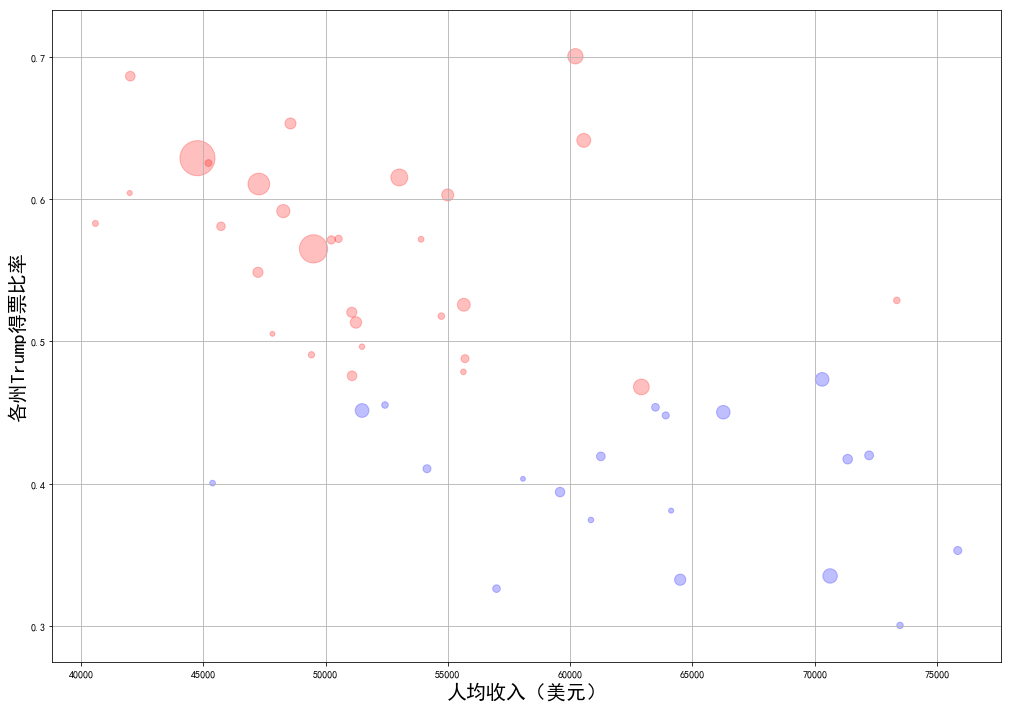

In [15]:
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
colors = df_income_vote.Winner.map({'Trump':'Red', 'Clinton':'Blue'}) # 根据赢家设置颜色
spot_size = result_df.TotalVote / 200.0 # 设置点大小
plt.figure(figsize=(17, 12)) 
plt.scatter(x = df_income_vote['Income'], 
            y = df_income_vote['RatioTrump'],
            s=spot_size,
            c=colors,
            alpha=0.25)
# plt.scatter( x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, alpha=0.25)
plt.xlabel('人均收入（美元）',fontsize=20)
plt.ylabel('各州Trump得票比率',fontsize=20)
'''
spot_size = result_df['T-Ratio'] * 200 # 设置点大小
plt.figure(figsize=(17, 12)) 
plt.scatter(x = result_df['Income'], 
            y = result_df['TotalVote'],
            s=spot_size,
            c=colors,
            alpha=0.25)
# plt.scatter( x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, alpha=0.25)
plt.xlabel('人均收入（美元）',fontsize=20)
plt.ylabel('各州投票人数',fontsize=20)
'''
plt.grid(True) # 添加网格
plt.show()

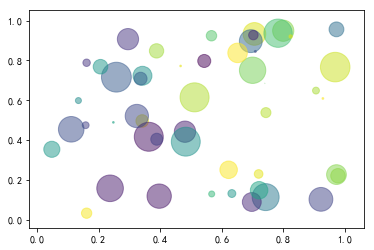

array([6.95642588e+02, 7.28065984e+02, 3.86071596e+00, 1.09732098e+02,
       2.10645990e+02, 5.15781732e+02, 2.90121918e+00, 4.72019572e+01,
       3.56383024e+02, 7.50790417e+01, 8.91407983e+02, 1.57328131e+02,
       8.73379951e+02, 5.23194081e+02, 2.77470908e+00, 9.08415917e+01,
       8.42907189e+02, 3.21830151e+00, 5.78495617e-02, 3.07202603e+02,
       3.80875230e+02, 5.92819929e+02, 1.70255255e+02, 4.50388287e+02,
       3.07560235e+02, 4.51260371e+02, 5.54151788e+01, 2.13511128e+02,
       3.63158734e+01, 4.54384353e+02, 3.57876788e+02, 8.39503324e+02,
       3.91684529e+02, 6.54886228e+02, 2.06430060e+02, 8.01230404e+02,
       2.20486129e+02, 8.37226448e+02, 1.66697944e+02, 3.64774135e+01,
       2.60153906e+02, 1.44302430e+02, 4.76724507e+01, 1.07122811e+02,
       1.01311546e+02, 6.28094850e+01, 5.43229836e+02, 5.66559836e+02,
       7.08456362e+02, 1.15921790e+01])

In [18]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
area